# 📊 Визуализация NLP анализа отзывов

Этот ноутбук визуализирует результаты анализа тональности и проблем из отзывов.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Настройка стиля
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Поддержка русского языка
plt.rcParams['font.family'] = 'DejaVu Sans'

print("✅ Библиотеки загружены")


✅ Библиотеки загружены


In [35]:
# Загрузка данных
# Путь относительно корня проекта (ноутбук находится в docs/)
import os
import sys

# Добавляем корневую папку проекта в путь
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Загружаем исходные данные
df = pd.read_csv('../data/all_reviews.csv', encoding='utf-8-sig')

print(f"📊 Загружено {len(df)} отзывов")
print(f"📋 Колонки: {', '.join(df.columns)}")

# Запускаем NLP анализ
print("\n⏳ Запускаем NLP анализ отзывов...")
from nlp.review_analyzer import ReviewAnalyzer

analyzer = ReviewAnalyzer()

# Проверяем наличие колонки 'rating'
rating_col = 'rating' if 'rating' in df.columns else None

# Запускаем анализ (результаты хранятся только в памяти)
df_analyzed = analyzer.analyze_dataframe(df, text_column='text', rating_column=rating_col, n_jobs=4)

# Объединяем результаты анализа с исходным DataFrame
df = df.reset_index().merge(df_analyzed, left_on='index', right_on='original_index', how='left').drop(columns=['index', 'original_index'])

print(f"✅ NLP анализ завершен!")
print(f"📊 Всего проанализировано отзывов: {len(df)}")
print(f"📋 Новые колонки: {', '.join([col for col in df.columns if col not in ['id', 'text', 'rating', 'author', 'date', 'source']])}")

df.head()


📊 Загружено 2772 отзывов
📋 Колонки: id, text, rating, author, date, source

⏳ Запускаем NLP анализ отзывов...
✅ NLP анализ завершен!
📊 Всего проанализировано отзывов: 2772
📋 Новые колонки: text_x, rating_x, text_y, rating_y, sentiment, sentiment_score, sentiment_confidence, has_problems, problems_count, problems, problem_categories, rating_sentiment_mismatch


,id,text_x,rating_x,author,date,source,text_y,rating_y,sentiment,sentiment_score,sentiment_confidence,has_problems,problems_count,problems,problem_categories,rating_sentiment_mismatch
0,twogis_000,"Вкусная еда, авторские коктейли, приятное обсл...",3,МарияМурзаева,2025-11-14,2GIS,"Вкусная еда, авторские коктейли, приятное обсл...",3,positive,1.000,0.1,False,0,[],[],False
1,twogis_001,"Неплохо, ел Рамен и ребраС звкзд с неба не хва...",3,АндрейШавнев,2025-11-14,2GIS,"Неплохо, ел Рамен и ребраС звкзд с неба не хва...",3,neutral,0.000,0.0,False,0,[],[],False
2,twogis_002,Замечательная кухня и прекрасный персонал,3,ЭлинаХохрякова,2025-11-14,2GIS,Замечательная кухня и прекрасный персонал,3,positive,1.000,0.2,False,0,[],[],False
3,twogis_003,Очень вкусные коктейли,3,AlexeyMilechin,2025-11-14,2GIS,Очень вкусные коктейли,3,positive,1.000,0.1,False,0,[],[],False
4,twogis_004,Очень вкусная еда. Пробовали почти все закуски...,3,AleksandrNikolaev,2025-11-14,2GIS,Очень вкусная еда. Пробовали почти все закуски...,3,positive,0.171,0.7,False,0,[],[],False


## 📈 1. Распределение тональности


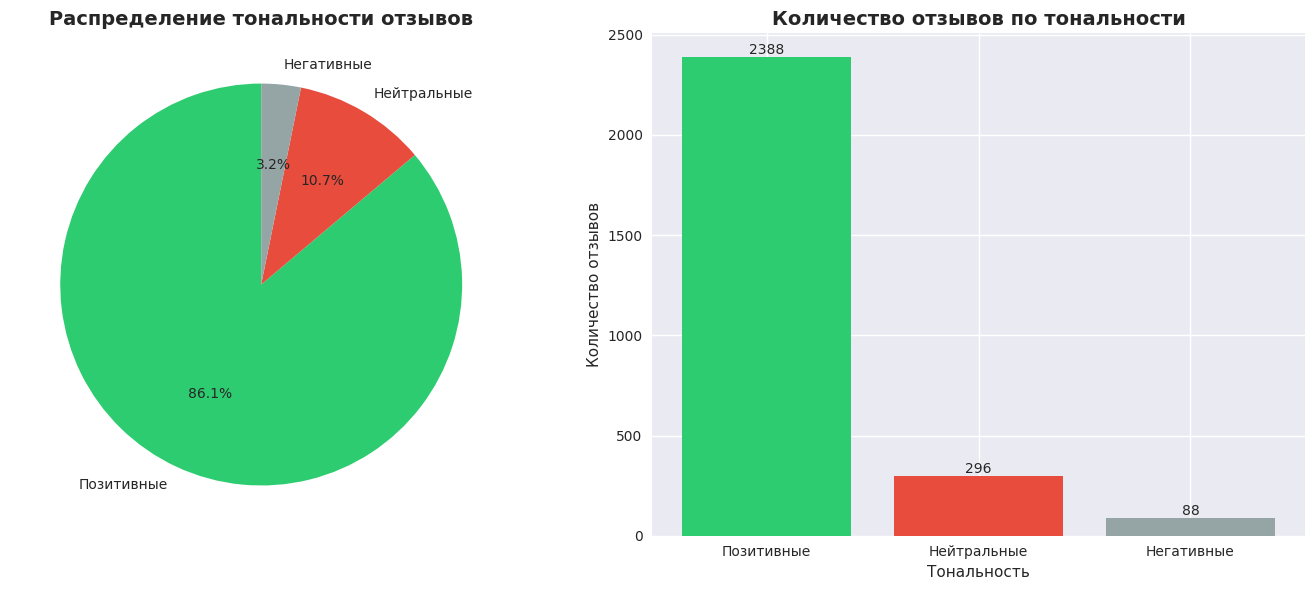


📊 Статистика:
  Позитивные: 2388 (86.1%)
  Нейтральные: 296 (10.7%)
  Негативные: 88 (3.2%)


In [36]:
# Подсчет тональности
sentiment_counts = df['sentiment'].value_counts()

# Перевод на русский
sentiment_labels = {
    'positive': 'Позитивные',
    'negative': 'Негативные',
    'neutral': 'Нейтральные'
}

sentiment_counts_ru = pd.Series({
    sentiment_labels.get(k, k): v 
    for k, v in sentiment_counts.items()
})

# Создание графика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Круговая диаграмма
colors = ['#2ecc71', '#e74c3c', '#95a5a6']
ax1.pie(sentiment_counts_ru.values, 
        labels=sentiment_counts_ru.index, 
        autopct='%1.1f%%',
        colors=colors,
        startangle=90)
ax1.set_title('Распределение тональности отзывов', fontsize=14, fontweight='bold')

# Столбчатая диаграмма
bars = ax2.bar(sentiment_counts_ru.index, sentiment_counts_ru.values, color=colors)
ax2.set_title('Количество отзывов по тональности', fontsize=14, fontweight='bold')
ax2.set_ylabel('Количество отзывов')
ax2.set_xlabel('Тональность')

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n📊 Статистика:")
for sentiment, count in sentiment_counts_ru.items():
    percent = count / len(df) * 100
    print(f"  {sentiment}: {count} ({percent:.1f}%)")


## 🔍 2. Анализ проблем и жалоб


In [37]:
# Подсчет проблем по категориям
all_categories = []
for categories in df['problem_categories']:
    if pd.notna(categories) and categories:
        # problem_categories может быть списком или строкой
        if isinstance(categories, list):
            all_categories.extend(categories)
        elif isinstance(categories, str):
            # Если строка, пробуем разделить по запятым
            cats = [c.strip() for c in categories.split(',') if c.strip()]
            all_categories.extend(cats)

category_counts = Counter(all_categories)

# Перевод категорий на русский
category_translation = {
    'качество_еды': 'Качество еды',
    'обслуживание': 'Обслуживание',
    'чистота': 'Чистота',
    'цены': 'Цены',
    'ожидание': 'Ожидание',
    'атмосфера': 'Атмосфера',
    'технические': 'Технические',
    'размер_порций': 'Размер порций'
}

category_counts_ru = {category_translation.get(k, k): v for k, v in category_counts.items()}

if category_counts_ru:
    # Создание графика
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Топ проблем (горизонтальная диаграмма)
    top_categories = dict(sorted(category_counts_ru.items(), key=lambda x: x[1], reverse=True)[:10])
    
    y_pos = np.arange(len(top_categories))
    bars = ax1.barh(y_pos, list(top_categories.values()), color='#e74c3c')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(list(top_categories.keys()))
    ax1.set_xlabel('Количество упоминаний')
    ax1.set_title('Топ проблем в отзывах', fontsize=14, fontweight='bold')
    ax1.invert_yaxis()
    
    # Добавление значений
    for i, (category, count) in enumerate(top_categories.items()):
        ax1.text(count + 0.5, i, str(count), va='center')
    
    # Круговая диаграмма
    if len(top_categories) > 0:
        ax2.pie(top_categories.values(), 
                labels=top_categories.keys(), 
                autopct='%1.1f%%',
                startangle=90)
        ax2.set_title('Распределение проблем', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔍 Всего проблем найдено: {sum(category_counts_ru.values())}")
    print(f"📝 Отзывов с проблемами: {df['has_problems'].sum()} ({df['has_problems'].sum()/len(df)*100:.1f}%)")
    print(f"\n📊 Топ проблем:")
    for i, (cat, count) in enumerate(sorted(category_counts_ru.items(), key=lambda x: x[1], reverse=True)[:10], 1):
        print(f"  {i}. {cat}: {count}")
else:
    print("⚠️ Проблемы не найдены")


ValueError: The truth value of an empty array is ambiguous. Use `array.size > 0` to check that an array is not empty.

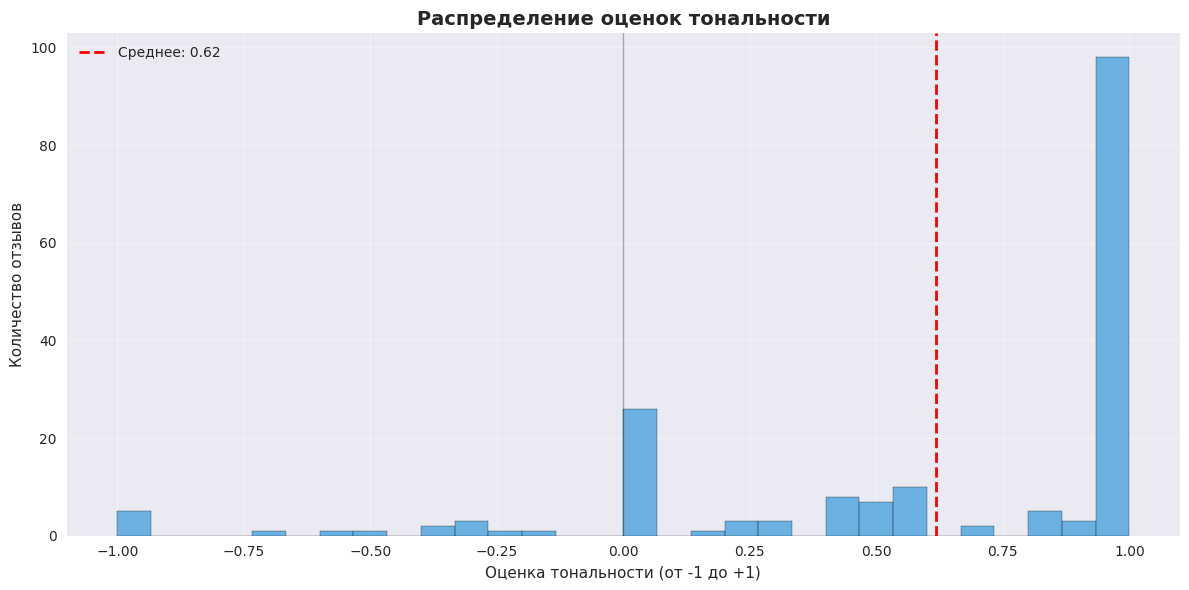


📈 Статистика оценок:
  Среднее: 0.619
  Медиана: 1.000
  Мин: -1.000
  Макс: 1.000


In [ ]:
# Гистограмма оценок тональности
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(df['sentiment_score'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
ax.axvline(df['sentiment_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df["sentiment_score"].mean():.2f}')
ax.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.3)

ax.set_title('Распределение оценок тональности', fontsize=14, fontweight='bold')
ax.set_xlabel('Оценка тональности (от -1 до +1)')
ax.set_ylabel('Количество отзывов')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 Статистика оценок:")
print(f"  Среднее: {df['sentiment_score'].mean():.3f}")
print(f"  Медиана: {df['sentiment_score'].median():.3f}")
print(f"  Мин: {df['sentiment_score'].min():.3f}")
print(f"  Макс: {df['sentiment_score'].max():.3f}")


## 🔗 4. Связь тональности и проблем


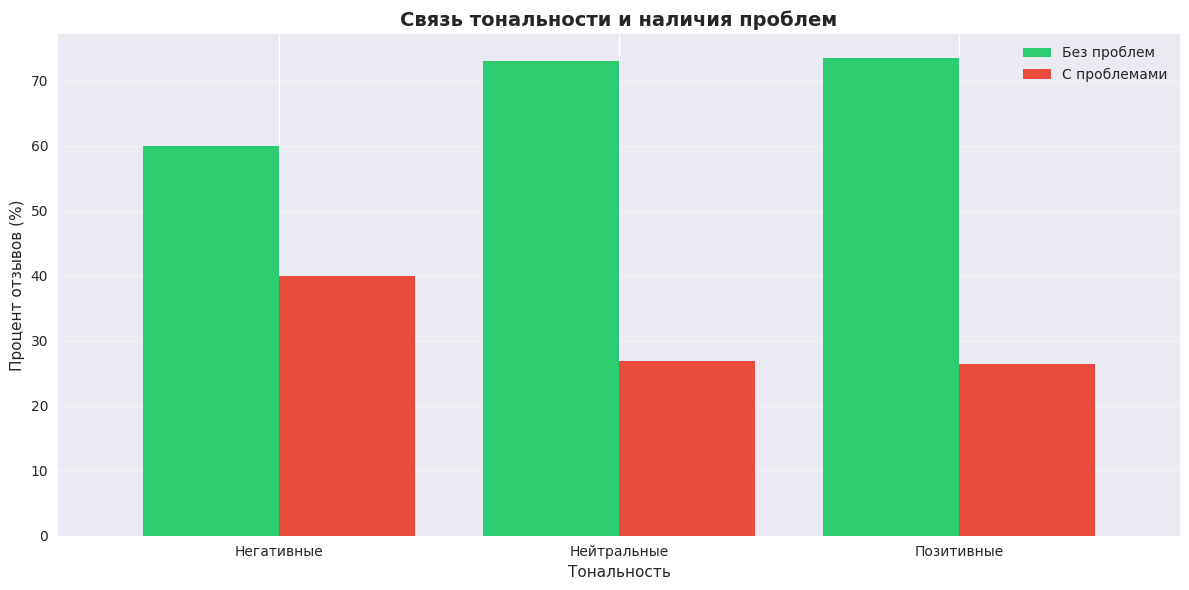


📊 Процент отзывов с проблемами по тональности:
  Негативные: 40.0%
  Нейтральные: 26.9%
  Позитивные: 26.4%


In [ ]:
# Связь между тональностью и наличием проблем
fig, ax = plt.subplots(figsize=(12, 6))

# Создание сводной таблицы
pivot_data = pd.crosstab(df['sentiment'], df['has_problems'], normalize='index') * 100

# Перевод на русский
pivot_data.index = [sentiment_labels.get(idx, idx) for idx in pivot_data.index]
pivot_data.columns = ['Без проблем', 'С проблемами']

# Создание графика
pivot_data.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'], width=0.8)
ax.set_title('Связь тональности и наличия проблем', fontsize=14, fontweight='bold')
ax.set_xlabel('Тональность')
ax.set_ylabel('Процент отзывов (%)')
ax.legend(title='')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Процент отзывов с проблемами по тональности:")
for sentiment in pivot_data.index:
    with_problems = pivot_data.loc[sentiment, 'С проблемами']
    print(f"  {sentiment}: {with_problems:.1f}%")


## ⭐ 5. Анализ по рейтингам (если есть)


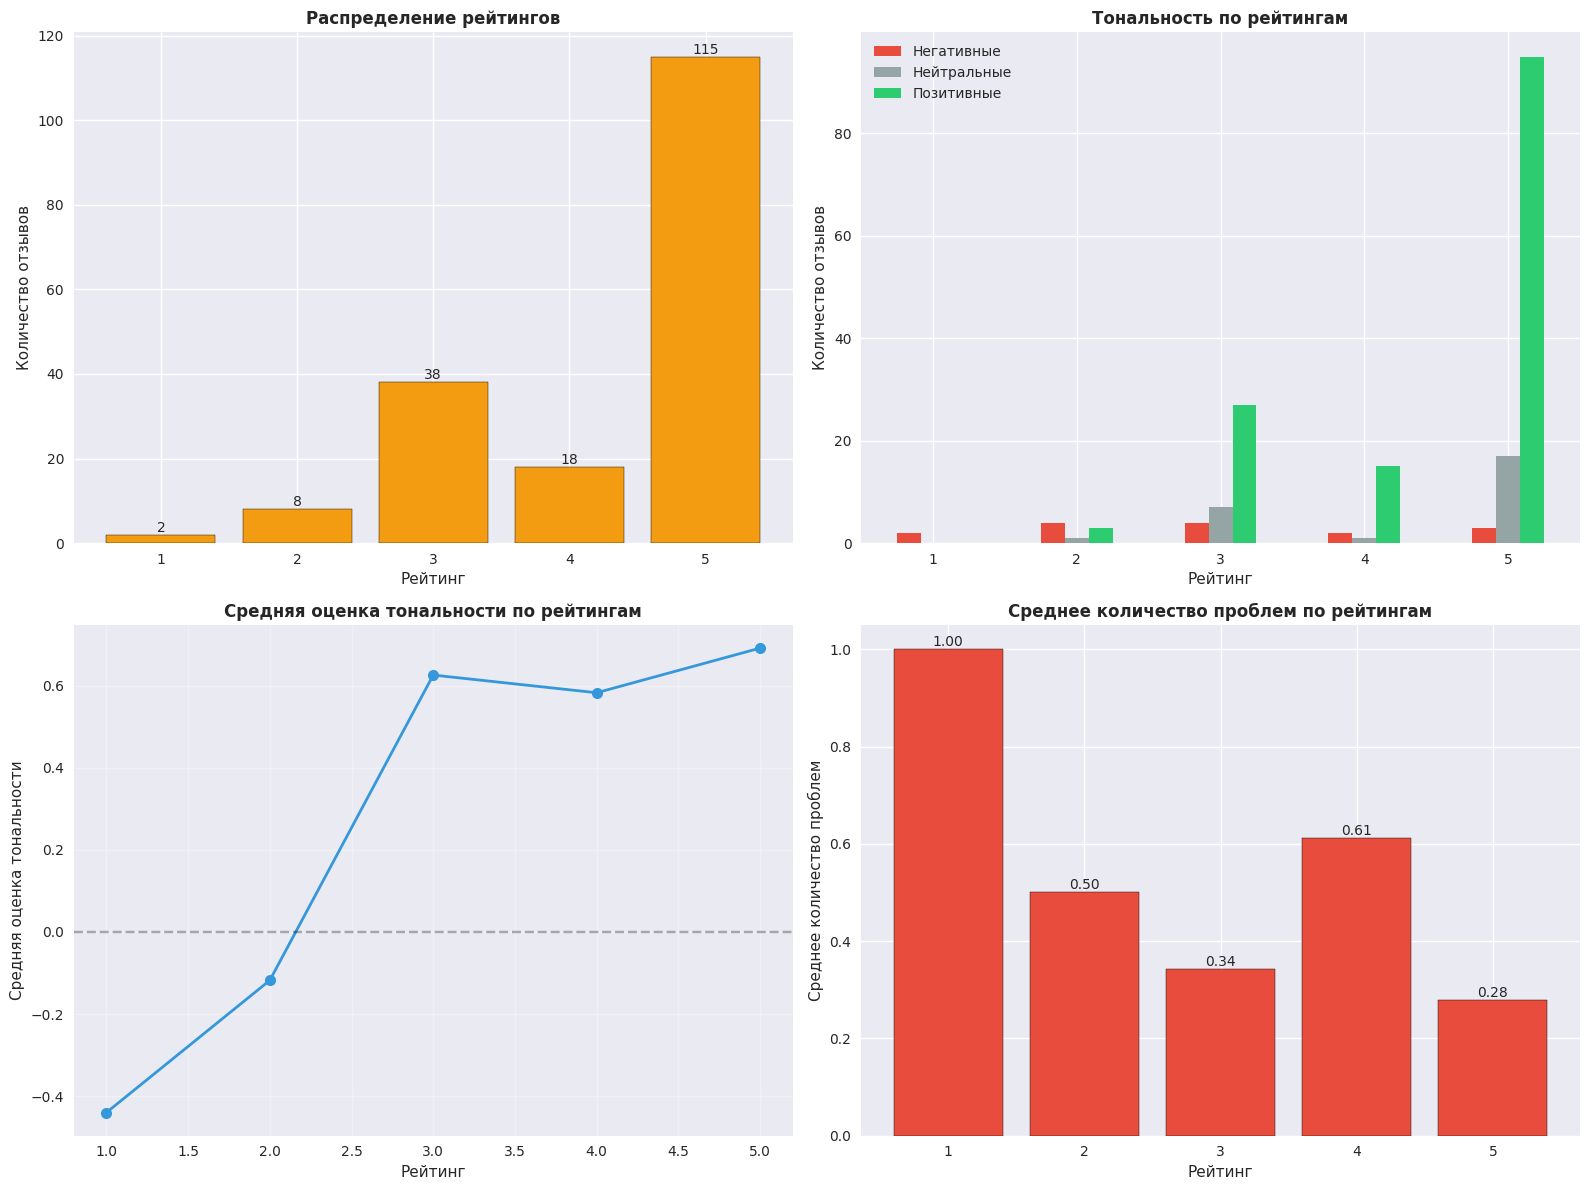


📊 Статистика по рейтингам:
        sentiment_score  problems_count  text
rating                                       
1                -0.440           1.000     2
2                -0.118           0.500     8
3                 0.626           0.342    38
4                 0.583           0.611    18
5                 0.691           0.278   115


In [ ]:
# Анализ по рейтингам, если колонка есть
if 'rating' in df.columns and df['rating'].notna().any():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Распределение рейтингов
    rating_counts = df['rating'].value_counts().sort_index()
    bars1 = ax1.bar(rating_counts.index, rating_counts.values, color='#f39c12', edgecolor='black')
    ax1.set_title('Распределение рейтингов', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Рейтинг')
    ax1.set_ylabel('Количество отзывов')
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom')
    
    # Тональность по рейтингам
    rating_sentiment = pd.crosstab(df['rating'], df['sentiment'])
    rating_sentiment.plot(kind='bar', ax=ax2, color=['#e74c3c', '#95a5a6', '#2ecc71'])
    ax2.set_title('Тональность по рейтингам', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Рейтинг')
    ax2.set_ylabel('Количество отзывов')
    ax2.legend(['Негативные', 'Нейтральные', 'Позитивные'])
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
    
    # Средняя оценка тональности по рейтингам
    avg_sentiment_by_rating = df.groupby('rating')['sentiment_score'].mean()
    ax3.plot(avg_sentiment_by_rating.index, avg_sentiment_by_rating.values, 
             marker='o', linewidth=2, markersize=8, color='#3498db')
    ax3.set_title('Средняя оценка тональности по рейтингам', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Рейтинг')
    ax3.set_ylabel('Средняя оценка тональности')
    ax3.grid(True, alpha=0.3)
    ax3.axhline(0, color='black', linestyle='--', alpha=0.3)
    
    # Проблемы по рейтингам
    problems_by_rating = df.groupby('rating')['problems_count'].mean()
    bars4 = ax4.bar(problems_by_rating.index, problems_by_rating.values, color='#e74c3c', edgecolor='black')
    ax4.set_title('Среднее количество проблем по рейтингам', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Рейтинг')
    ax4.set_ylabel('Среднее количество проблем')
    for bar in bars4:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Статистика по рейтингам:")
    print(df.groupby('rating').agg({
        'sentiment_score': 'mean',
        'problems_count': 'mean',
        'text': 'count'
    }).round(3))
else:
    print("⚠️ Колонка 'rating' не найдена или пуста")


In [ ]:
print("=" * 60)
print("📊 ИТОГОВАЯ СВОДКА ПО АНАЛИЗУ ОТЗЫВОВ")
print("=" * 60)
print(f"\n📝 Всего отзывов: {len(df)}")
print(f"\n📈 Тональность:")
for sentiment, count in sentiment_counts_ru.items():
    percent = count / len(df) * 100
    print(f"  • {sentiment}: {count} ({percent:.1f}%)")
print(f"\n🔍 Проблемы:")
print(f"  • Отзывов с проблемами: {df['has_problems'].sum()} ({df['has_problems'].sum()/len(df)*100:.1f}%)")
print(f"  • Всего проблем найдено: {df['problems_count'].sum()}")
print(f"  • Среднее проблем на отзыв: {df['problems_count'].mean():.2f}")
if category_counts_ru:
    print(f"\n📊 Топ-5 проблем:")
    for i, (cat, count) in enumerate(sorted(category_counts_ru.items(), key=lambda x: x[1], reverse=True)[:5], 1):
        print(f"  {i}. {cat}: {count} упоминаний")
print("\n" + "=" * 60)


📊 ИТОГОВАЯ СВОДКА ПО АНАЛИЗУ ОТЗЫВОВ

📝 Всего отзывов: 2772

📈 Тональность:
  • Позитивные: 1286 (46.4%)
  • Нейтральные: 153 (5.5%)
  • Негативные: 61 (2.2%)

🔍 Проблемы:


KeyError: 'has_problems'